<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Read World bank CSV

In [2]:
df = pd.read_csv('WorldBank.csv')

In [3]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.147485e+02,7.004085e+02,7.429281e+02,7.614417e+02,6.322694e+02,6.242250e+02,7.061028e+02,7.663608e+02,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614e+00,5.246771e+00,5.729495e+00,5.060904e+00,4.706801e+00,4.471147e+00,3.760466e+00,3.921611e+00,3.438072e+00,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.488050e+00,1.012461e+01,9.451370e+00,1.052948e+01,1.089112e+01,...,7.550664e-01,2.738416e-01,4.409538e-01,1.514439e+00,2.228351e+00,2.270593e+00,1.770314e+00,5.354193e-01,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,1.708001e+01,1.519791e+01,1.686304e+01,2.200813e+01,...,3.741041e+00,4.048246e+00,3.895215e+00,4.458509e+00,5.758038e+00,6.505293e+00,6.137617e+00,4.156488e+00,4.248261e+00,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346e+00,8.641136e+00,8.576307e+00,NaN,5.802677e+00,7.707811e+00,8.288774e+00,9.111423e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.002065e+00,1.312934e+00,1.516276e+00,1.695659e+00,2.092116e+00,1.937363e+00,1.506588e+00,1.552336e+00,1.760283e+00,NaN
1436,India,IND,"Net capital account (BoP, current US$)",BN.TRF.KOGT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.791581e+07,-5.972328e+08,9.618297e+08,-7.433364e+07,3.706943e+07,1.368359e+08,3.731153e+07,-1.231007e+08,-1.155591e+09,NaN
1437,India,IND,"Travel services (% of service imports, BoP)",BM.GSR.TRVL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.761773e+01,1.544257e+01,1.475397e+01,1.799216e+01,1.795378e+01,1.707263e+01,1.686302e+01,1.716750e+01,1.755462e+01,NaN
1438,India,IND,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,8.737650e+07,8.725755e+07,9.037301e+07,9.370600e+07,7.969950e+07,...,2.878600e+08,2.932900e+08,2.949095e+08,2.960100e+08,2.843330e+08,2.978500e+08,3.136100e+08,NaN,NaN,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [14]:
 data = df[df['Indicator Name'] == 'Population ages 15-64 (% of total population)']
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,...,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811,NaN


In [15]:
df['Indicator Name']

0                         Export value index (2000 = 100)
1       Insurance and financial services (% of commerc...
2       Merchandise imports by the reporting economy, ...
3                 Food imports (% of merchandise imports)
4       Share of tariff lines with international peaks...
                              ...                        
1435    Foreign direct investment, net inflows (% of GDP)
1436               Net capital account (BoP, current US$)
1437          Travel services (% of service imports, BoP)
1438                      Cereal production (metric tons)
1439                         Arable land (% of land area)
Name: Indicator Name, Length: 1440, dtype: object

In [19]:
x = np.arange(1960,2021).reshape(-1,1)
x

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020]])

In [24]:
# new range of x becuase last value pf y is null
# so we remove the last value of y therefor we have to remove the last year 2020 ans the range became the 1960-2019
x = np.arange(1960,2020).reshape(-1,1)
x

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [27]:
y = data.values[0][4::]
y

array([56.49748004, 56.17753236, 55.80745463, 55.46166361, 55.24893881,
       55.21135053, 55.09090078, 55.15534672, 55.34507283, 55.57014408,
       55.78194745, 55.85676846, 55.95268174, 56.07247186, 56.23447551,
       56.44405309, 56.49722595, 56.62068516, 56.78900152, 56.9691436,
       57.1425581, 57.18105454, 57.22630775, 57.28875038, 57.39054366,
       57.54142108, 57.55350984, 57.6545119, 57.81875323, 58.01501187,
       58.22990246, 58.37403848, 58.5472698, 58.75605047, 59.012126,
       59.31657719, 59.56507329, 59.8572303, 60.18600058, 60.53971518,
       60.90862046, 61.18898716, 61.4993847, 61.83084479, 62.173897,
       62.52276485, 62.80842981, 63.10261029, 63.40924784, 63.74196691,
       64.10821053, 64.429404, 64.80551944, 65.20848906, 65.5959799,
       65.94416405, 66.27426247, 66.53818711, 66.7667425, 67.00381119,
       nan], dtype=object)

In [36]:
# because last value of y is null so we have to remove it from y
y = data.values[0][4:-1:]
y

array([56.49748004, 56.17753236, 55.80745463, 55.46166361, 55.24893881,
       55.21135053, 55.09090078, 55.15534672, 55.34507283, 55.57014408,
       55.78194745, 55.85676846, 55.95268174, 56.07247186, 56.23447551,
       56.44405309, 56.49722595, 56.62068516, 56.78900152, 56.9691436,
       57.1425581, 57.18105454, 57.22630775, 57.28875038, 57.39054366,
       57.54142108, 57.55350984, 57.6545119, 57.81875323, 58.01501187,
       58.22990246, 58.37403848, 58.5472698, 58.75605047, 59.012126,
       59.31657719, 59.56507329, 59.8572303, 60.18600058, 60.53971518,
       60.90862046, 61.18898716, 61.4993847, 61.83084479, 62.173897,
       62.52276485, 62.80842981, 63.10261029, 63.40924784, 63.74196691,
       64.10821053, 64.429404, 64.80551944, 65.20848906, 65.5959799,
       65.94416405, 66.27426247, 66.53818711, 66.7667425, 67.00381119],
      dtype=object)

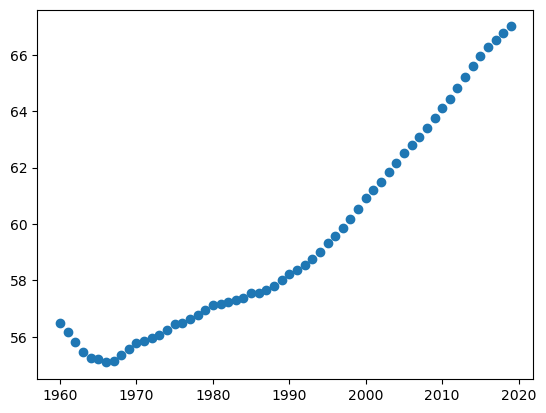

In [37]:
plt.scatter(x,y)

# Divide the data into input and output

In [39]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=0)
# here random_state means selection values for state 0 remain same
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
x_train

array([[1974],
       [1992],
       [2010],
       [1989],
       [2002],
       [2014],
       [1978],
       [2016],
       [1987],
       [1975],
       [1965],
       [1991],
       [1976],
       [2011],
       [1980],
       [2012],
       [1968],
       [1973],
       [1985],
       [1997],
       [1977],
       [2005],
       [2008],
       [2017],
       [1998],
       [1961],
       [1972],
       [2006],
       [1984],
       [1966],
       [1983],
       [1996],
       [1981],
       [1979],
       [1969],
       [1999],
       [2015],
       [1963],
       [1960],
       [2013],
       [2007],
       [2004]])

# Plot scatter plot of Population ages 15-64 (% of total population)

# Splitting the dataset into the Training set and Test set

# Fitting SVR on 3 Different Kernel on dataset

In [42]:
model_rbf = SVR()

In [43]:
model_rbf.fit(x_train,y_train)

SVR()

# Linear SVR

In [52]:
model_linear = SVR(kernel = 'linear')

In [54]:
model_linear.fit(x_train,y_train)

SVR(kernel='linear')

# Ploynomial SVR

In [59]:
model_poly = SVR(kernel='poly')

In [60]:
model_poly.fit(x_train,y_train)

SVR(kernel='poly')

# Predict the x_test using 3 Kernel

In [46]:
y_predict = model_rbf.predict(x_test)
y_predict

array([57.73445326, 59.30206118, 64.8451716 , 57.99812952, 55.96479236,
       56.12587167, 59.06485884, 64.91876466, 60.76906052, 57.24445561,
       55.93360816, 55.89821768, 58.29641078, 61.1088798 , 58.84682535,
       61.81299688, 63.81278461, 55.81527994])

In [50]:
model_rbf.score(x_train,y_train)

0.9853631804056939

In [51]:
model_rbf.score(x_test,y_test)

0.9596561443177338

# Predict for SVR linear

In [55]:
y_predict_linear = model_linear.predict(x_test)
y_predict_linear

array([58.6462474 , 60.52986093, 65.55283034, 59.06482819, 55.50689152,
       53.62327799, 60.32057054, 65.34353995, 61.57631289, 57.80908583,
       54.04185878, 55.29760113, 59.48340897, 61.78560328, 60.11128015,
       62.20418406, 63.45992642, 54.66972995])

In [64]:
model_linear.score(x_train,y_train)

0.919305859937272

In [65]:
model_linear.score(x_test,y_test)

0.9052410452554964

# Predict for poly SVR

In [61]:
y_predict_poly = model_poly.predict(x_test)
y_predict_poly

array([  48805.34104093,   -5232.84792391, -151735.12282626,
         36839.07492765,  137786.6335214 ,  190529.58103117,
           795.54611906, -145560.78347079,  -35465.55300204,
         72665.69699796,  178850.62619718,  143670.81125577,
         24848.69797452,  -41530.27370516,    6817.88645109,
        -53677.89431063,  -90266.57058016,  161287.5475839 ])

In [66]:
model_poly.score(x_train,y_train)

-880108673.6976731

In [67]:
model_poly.score(x_test,y_test)

-883317332.7729851

# Visualising the  results

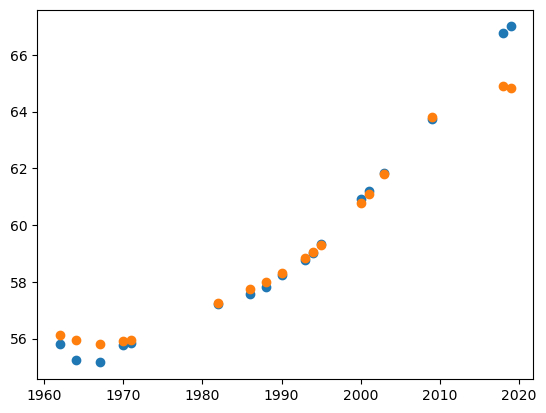

In [47]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict)

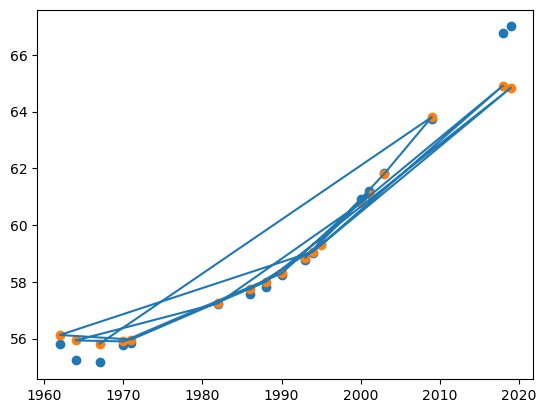

In [58]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict)
plt.plot(x_test,y_predict)

# Visulization for linear

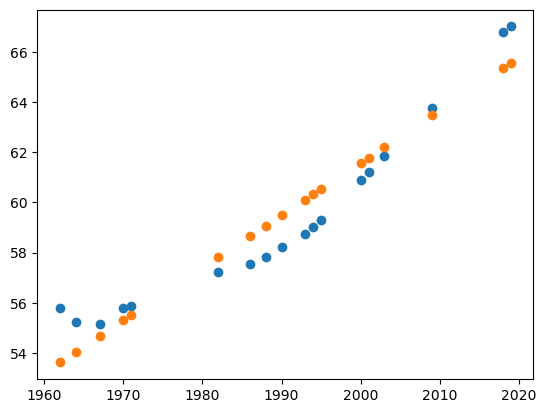

In [56]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict_linear)

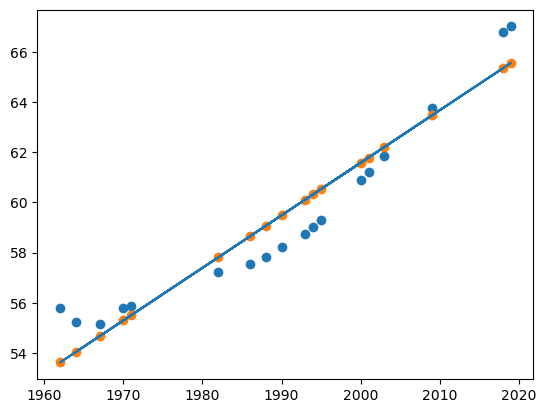

In [57]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict_linear)
plt.plot(x_test,y_predict_linear)

# Visulization for SVR poly

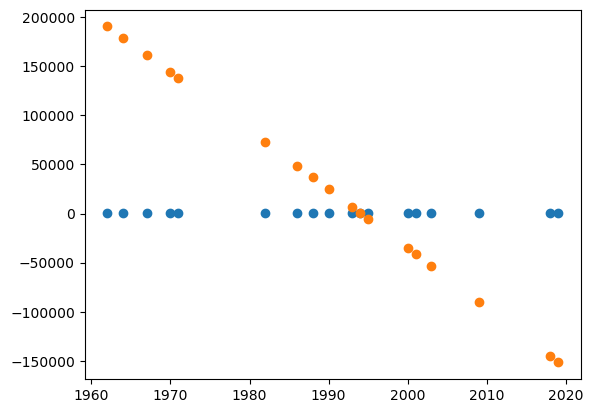

In [62]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict_poly)

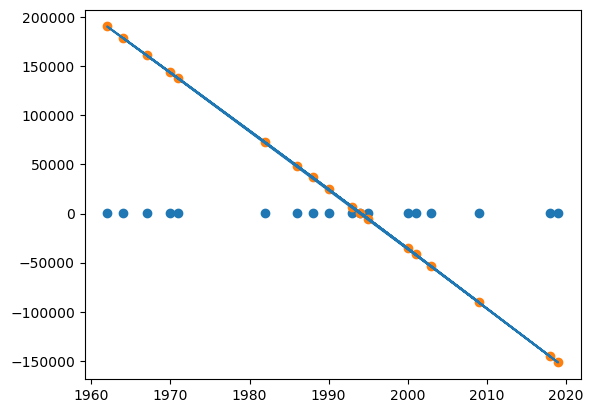

In [63]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict_poly)
plt.plot(x_test,y_predict_poly)


# Decision Tree Classifier

In [21]:
# Visualising the  resultsfrom sklearn.datasets import load_iris

# Import iris data ser using sklearn

In [69]:
from sklearn.datasets import load_iris

In [74]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [78]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [79]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Importing the libraries

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Divide the data into input and output

In [81]:
X = iris['data']
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [82]:
Y = iris['target']
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Splitting the dataset into the Training set and Test set

In [91]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.7, random_state=0)

In [92]:
x_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [93]:
y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

# Fitting DecisionTreeClassifier   on dataset

In [94]:
model_dtc = DecisionTreeClassifier()

In [95]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# Display Decision Tree

[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

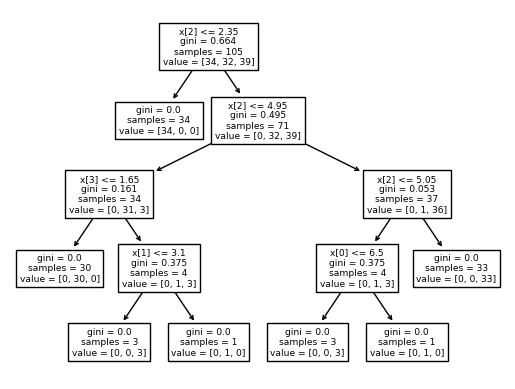

In [96]:
tree.plot_tree(model_dct)

# Predict the x_test 

In [97]:
y_predict_dtc = model_dct.predict(x_train)

In [98]:
y_predict_dtc

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])